In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

import statsmodels.api as sm

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics
from sklearn.metrics import mean_squared_error
%matplotlib inline

from sklearn.model_selection import GridSearchCV

In [7]:

from sklearn.linear_model import LinearRegression, Lasso, Ridge, BayesianRidge, ElasticNet, HuberRegressor

from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, AdaBoostRegressor, GradientBoostingRegressor

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

In [8]:
df=pd.read_csv('winequality.csv')
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5


In [120]:
x=df.drop(['quality'],axis=1).values
y=df['quality'].values

# evaluate models

In [10]:
def evaluate(df,model):
    x=df.drop(['quality'],axis=1)
    y=df['quality']

    x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)
    RMSE_score=[]
    for name, model in model:
        model = model
        model.fit(x_train, y_train)
        y_pred = model.predict(x_test)
        RMSE_score.append([name,round((np.sqrt(mean_squared_error(y_test, y_pred)))/df['quality'].mean()*100,2),round(metrics.r2_score(y_test, y_pred), 2)])
    return pd.DataFrame(RMSE_score, columns=['Name','RMSE', 'R Square'])

All of the chosen models are regressor, since the features data type is continuous and the target can be assumed as continuous. Classifier models can also be used, but since the target data available only ranged from 3-8, when it full range is 1-10, using classifier will limit the prediction results on the available target data (prediction results will only ranged on 3-8).  
 
I use regressor to see if I can interpolate the prediction, hence including the unavaible target in the prediction.

In [11]:
models = [
    ['Linear Regression', LinearRegression()],
    ['ElasticNet', ElasticNet()],
    ['Lasso', Lasso()],
    ['Ridge', Ridge()],
    ['DecisionTree', DecisionTreeRegressor()],
    ['RandomForest', RandomForestRegressor()],
    
    ['KNeighbours', KNeighborsRegressor(n_neighbors = 2)],
    ['SVM', SVR()],
    ['AdaBoost', AdaBoostRegressor()],
    ['GradientBoosting', GradientBoostingRegressor()],
    ['BayesianRidge', BayesianRidge()],
    ['Huber', HuberRegressor()]
]

In [12]:
#unprocessed data
evaluate(df,models)

,Name,RMSE,R Square
0,Linear Regression,11.00,0.33
1,ElasticNet,13.22,0.03
2,Lasso,13.23,0.03
3,Ridge,10.98,0.33
4,DecisionTree,14.78,-0.21
5,RandomForest,10.13,0.43
6,KNeighbours,14.06,-0.10
7,SVM,12.22,0.17
8,AdaBoost,11.15,0.31
9,GradientBoosting,10.76,0.36


In [13]:
# drop outliers
df2=pd.read_csv('df_dropoutlier.csv')
df2=df2.drop('Unnamed: 0', axis=1)
evaluate(df2,models)

,Name,RMSE,R Square
0,Linear Regression,10.58,0.36
1,ElasticNet,12.95,0.04
2,Lasso,13.02,0.03
3,Ridge,10.62,0.35
4,DecisionTree,14.47,-0.20
5,RandomForest,10.15,0.41
6,KNeighbours,13.84,-0.10
7,SVM,12.10,0.16
8,AdaBoost,10.84,0.33
9,GradientBoosting,10.23,0.40


In [14]:
# rescale with log
df3=pd.read_csv('df_log.csv')
df3=df3.drop('Unnamed: 0', axis=1)
df3['quality']= df['quality']
evaluate(df3,models)

,Name,RMSE,R Square
0,Linear Regression,10.89,0.34
1,ElasticNet,13.46,-0.00
2,Lasso,13.46,-0.00
3,Ridge,10.87,0.34
4,DecisionTree,14.75,-0.21
5,RandomForest,10.14,0.43
6,KNeighbours,12.73,0.10
7,SVM,10.93,0.34
8,AdaBoost,10.99,0.33
9,GradientBoosting,10.80,0.35


In [15]:
# rescale with squareroot
df4=pd.read_csv('df_sqrt.csv')
df4=df4.drop('Unnamed: 0', axis=1)
df4['quality']= df['quality']
evaluate(df4,models)

,Name,RMSE,R Square
0,Linear Regression,10.90,0.34
1,ElasticNet,13.46,-0.00
2,Lasso,13.46,-0.00
3,Ridge,10.90,0.34
4,DecisionTree,15.04,-0.26
5,RandomForest,10.14,0.43
6,KNeighbours,13.38,0.01
7,SVM,11.13,0.31
8,AdaBoost,11.18,0.31
9,GradientBoosting,10.79,0.35


In [16]:
# robust scaled
df5=pd.read_csv('df_rbscal.csv')
df5=df5.drop('Unnamed: 0', axis=1)
evaluate(df5,models)

,Name,RMSE,R Square
0,Linear Regression,11.00,0.33
1,ElasticNet,13.46,-0.00
2,Lasso,13.46,-0.00
3,Ridge,11.00,0.33
4,DecisionTree,15.30,-0.30
5,RandomForest,10.09,0.43
6,KNeighbours,13.18,0.04
7,SVM,10.79,0.35
8,AdaBoost,11.14,0.31
9,GradientBoosting,10.76,0.36


The best evaluation result is when the data is unprocessed. Random forest regressor consistently gives the best evaluation (lowest error, highest R square). 

# Tunning

## Random Forest

In [97]:
x=df.drop(['quality'],axis=1)
y=df['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [71]:
print(y_train.value_counts())
print(y_test.value_counts())

5    546
6    496
7    172
4     42
8     15
3      8
Name: quality, dtype: int64
6    142
5    135
7     27
4     11
8      3
3      2
Name: quality, dtype: int64


In [28]:
criterion=['mae', 'mse']
max_depth=[2,5,10,15,20,50,100] #kedalaman pohon
min_samples_split=[1,2,5,10,20,50,100,250] #jumlah minimal sample sebelum dibagi lagi
min_samples_leaf=[1,2,5,10,20,50,100,250]# jumlah minimal sample per subset data
max_features=['auto', 'sqrt', 'log2'] # jumlah feature yang dipertimbangkan dalam mencari pembagian data terbaik

param_rf={'criterion':criterion,'max_depth':max_depth,'min_samples_split':min_samples_split, 'min_samples_leaf':min_samples_leaf,'max_features':max_features}

param_rf

{'criterion': ['mae', 'mse'],
 'max_depth': [2, 5, 10, 15, 20, 50, 100],
 'min_samples_split': [1, 2, 5, 10, 20, 50, 100, 250],
 'min_samples_leaf': [1, 2, 5, 10, 20, 50, 100, 250],
 'max_features': ['auto', 'sqrt', 'log2']}

In [26]:
model_rf=RandomForestRegressor()
model_rf_gs=GridSearchCV(estimator=model_rf,param_grid= param_rf, cv=5)
model_rf_gs.fit(x_train, y_train)
model_rf_gs.best_params_

In [84]:
model=RandomForestRegressor(criterion ='mse',
 max_depth= 100,
 max_features= 'log2',
 min_samples_leaf= 1,
 min_samples_split= 2)

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
pd.DataFrame([round((np.sqrt(mean_squared_error(y_test, y_pred)))/df['quality'].mean()*100,2),round(metrics.r2_score(y_test, y_pred), 2)], columns= ['Score'],index=['RMSE','R Square'])

,Score
RMSE,9.85
R Square,0.46


## ridge regression

In [44]:
x=df.drop(['quality'],axis=1)
y=df['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [31]:
alpha= [0.1,0.5,1,2,5,10]
solver=['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga']
max_iter=[None, 10,100,1000]
fit_intercept=[True,False]
param_rr={'alpha':alpha, 'max_iter':max_iter,'solver':solver, 'fit_intercept':fit_intercept}

param_rr

{'alpha': [0.1, 0.5, 1, 2, 5, 10],
 'max_iter': [None, 10, 100, 1000],
 'solver': ['auto', 'svd', 'cholesky', 'lsqr', 'sparse_cg', 'sag', 'saga'],
 'fit_intercept': [True, False]}

In [32]:
model_rr=Ridge()
model_rr_gs=GridSearchCV(estimator=model_rr,param_grid= param_rr, cv=5)
model_rr_gs.fit(x_train, y_train)
model_rr_gs.best_params_

{'alpha': 1, 'fit_intercept': True, 'max_iter': None, 'solver': 'svd'}

In [45]:
model=Ridge(alpha=1, solver='svd')

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
pd.DataFrame([round((np.sqrt(mean_squared_error(y_test, y_pred)))/df['quality'].mean()*100,2),round(metrics.r2_score(y_test, y_pred), 2)], columns= ['Score'],index=['RMSE','R Square'])

,Score
RMSE,10.98
R Square,0.33


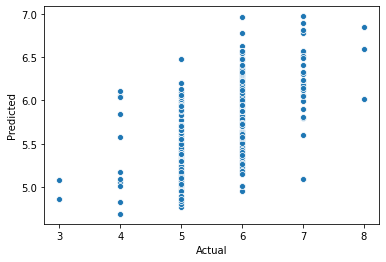

In [48]:
df_actpred=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
sns.scatterplot('Actual','Predicted', data=df_actpred)
plt.show()

### df drop outliers

In [39]:
x=df2.drop(['quality'],axis=1)
y=df2['quality']

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

In [20]:
model_rr=Ridge()
model_rr_gs=GridSearchCV(estimator=model_rr,param_grid= param_rr, cv=5)
model_rr_gs.fit(x_train, y_train)
model_rr_gs.best_params_

{'alpha': 0.5, 'fit_intercept': True, 'max_iter': None, 'solver': 'sparse_cg'}

In [40]:
model=Ridge(alpha=0.5, fit_intercept= True, max_iter= None, solver= 'sparse_cg')

model.fit(x_train, y_train)
y_pred = model.predict(x_test)
pd.DataFrame([round((np.sqrt(mean_squared_error(y_test, y_pred)))/df['quality'].mean()*100,2),round(metrics.r2_score(y_test, y_pred), 2)], columns= ['Score'],index=['RMSE','R Square'])

,Score
RMSE,10.57
R Square,0.36


The tunning of Random Forest parameters further reduce the error of the model by 1 %. At first I was about to decide with Random Forest model, but further reading about the model told me that Random Forest prediction cannot be interpolated, hence, I will use Ridge regression model instead. I chose Ridge regression since this model is often use to handle data with multicolinearity, which is prevalent in my data.

For Ridge regression the best evaluation is for the data frame after outlier drop. After tuning, the evaluation improved by 0.05%, with RMSE 10.57%. But,it needs to be noted that the data used is the one that dropped the outliers, eliminating wine with 3 and 8 quality ratings.

In [99]:
kolom=list(df.columns)
kolom.pop()
koef=list(model.coef_)
print('Intercept= ',model.intercept_)
pd.DataFrame([kolom,koef], index=['Coef name', 'Coef Values']).T

Intercept=  3.3729624325277525


,Coef name,Coef Values
0,fixed acidity,0.0175864
1,volatile acidity,-0.694534
2,citric acid,-0.269905
3,residual sugar,-0.0419254
4,chlorides,-0.0184391
5,free sulfur dioxide,0.00385437
6,total sulfur dioxide,-0.00252326
7,density,-0.00127601
8,pH,-0.430502
9,sulphates,1.68535


In [96]:
intercept=model.intercept_
equation=f'y={intercept}+'
for i in range(len(koef)):
    equation+=str(round(koef[i],3))
    equation+=' '+kolom[i]+ '+'

equation


'y=3.3729624325277525+0.018 fixed acidity+-0.695 volatile acidity+-0.27 citric acid+-0.042 residual sugar+-0.018 chlorides+0.004 free sulfur dioxide+-0.003 total sulfur dioxide+-0.001 density+-0.431 pH+1.685 sulphates+0.295 alcohol+'

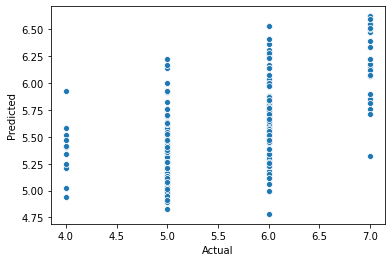

In [41]:
df_actpred=pd.DataFrame({'Actual': y_test, 'Predicted': y_pred.flatten()})
sns.scatterplot('Actual','Predicted', data=df_actpred)
plt.show()

## saving model

In [15]:
import joblib
df=pd.read_csv('df_dropoutlier.csv')
df2=df2.drop('Unnamed: 0', axis=1)

x=df.drop(['quality'],axis=1).values
y=df['quality'].values

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size = 0.2, random_state = 0)

model=Ridge(alpha=0.5, fit_intercept= True, max_iter= None, solver= 'sparse_cg')

model.fit(x_train, y_train)

#simpan model

joblib.dump(model, 'modelRidge')

['modelRidge']

https://gdcoder.com/random-forest-regressor-explained-in-depth/

https://gdcoder.com/decision-tree-regressor-explained-in-depth/

https://scikit-learn.org/stable/modules/tree.html#tree

https://scikit-learn.org/stable/modules/linear_model.html#ridge-regression

https://www.statisticshowto.com/ridge-regression/